In [1]:
## Student DataFest 2K18

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
## Reading the data
train = pd.read_csv("/content/Competitions/Hacker Earth/Data/train.csv")

In [4]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,03/12/2026,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,10/07/2025,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,11/08/2022,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,02/08/2022,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,01/05/2026,6978.00,1,8849.0


In [5]:
train = train.drop(['Image_path'], axis=1).reset_index(drop=True)

In [6]:
train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,BQ,41500.0,1037.5,03/12/2026,36142.68,0,0.0
1,BQ,50700.0,1267.5,10/07/2025,12753.00,1,6194.0
2,A,49500.0,1237.5,11/08/2022,43102.68,0,0.0
3,A,33500.0,837.5,02/08/2022,8453.00,1,7699.0
4,AC,27600.0,690.0,01/05/2026,6978.00,1,8849.0


In [7]:
''' Insuarance_company => Categorical,
Cost_of_vehicle => Numerical,
Min_coverage => Numerical,
Expiry Date => Date -> Time left,
Max_coverage => Numerical,
condiation => Binary,
Amount => Numerical
'''

' Insuarance_company => Categorical,\nCost_of_vehicle => Numerical,\nMin_coverage => Numerical,\nExpiry Date => Date -> Time left,\nMax_coverage => Numerical,\ncondiation => Binary,\nAmount => Numerical\n'

In [8]:
## Let's get some dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Insurance_company  1399 non-null   object 
 1   Cost_of_vehicle    1310 non-null   float64
 2   Min_coverage       1310 non-null   float64
 3   Expiry_date        1399 non-null   object 
 4   Max_coverage       1310 non-null   float64
 5   Condition          1399 non-null   int64  
 6   Amount             1388 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 76.6+ KB


In [9]:
import eda_utils as utils

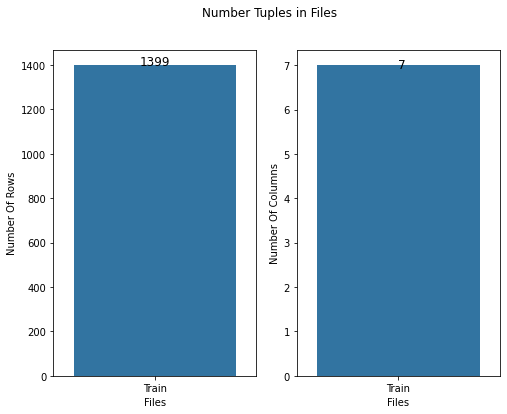

In [11]:
utils.plot_num_records({'Train': train})

In [10]:
### Lets check if the type of variables...
for col in train.columns:
    print(col, train[col].nunique())

Insurance_company 11
Cost_of_vehicle 307
Min_coverage 307
Expiry_date 1063
Max_coverage 389
Condition 2
Amount 1186


In [13]:
## Large No. of repeating values in columns.

In [14]:
train.head()
## here id is object only and not integer unlike other cases.

,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,BQ,41500.0,1037.5,03/12/2026,36142.68,0,0.0
1,BQ,50700.0,1267.5,10/07/2025,12753.00,1,6194.0
2,A,49500.0,1237.5,11/08/2022,43102.68,0,0.0
3,A,33500.0,837.5,02/08/2022,8453.00,1,7699.0
4,AC,27600.0,690.0,01/05/2026,6978.00,1,8849.0


In [11]:
## Changing the type of data to date type.
train['Expiry_date'] = pd.to_datetime(train['Expiry_date'], infer_datetime_format=True)

In [12]:
train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,BQ,41500.0,1037.5,2026-03-12,36142.68,0,0.0
1,BQ,50700.0,1267.5,2025-10-07,12753.00,1,6194.0
2,A,49500.0,1237.5,2022-11-08,43102.68,0,0.0
3,A,33500.0,837.5,2022-02-08,8453.00,1,7699.0
4,AC,27600.0,690.0,2026-01-05,6978.00,1,8849.0


In [17]:
train.dtypes=='object'

Insurance_company     True
Cost_of_vehicle      False
Min_coverage         False
Expiry_date          False
Max_coverage         False
Condition            False
Amount               False
dtype: bool

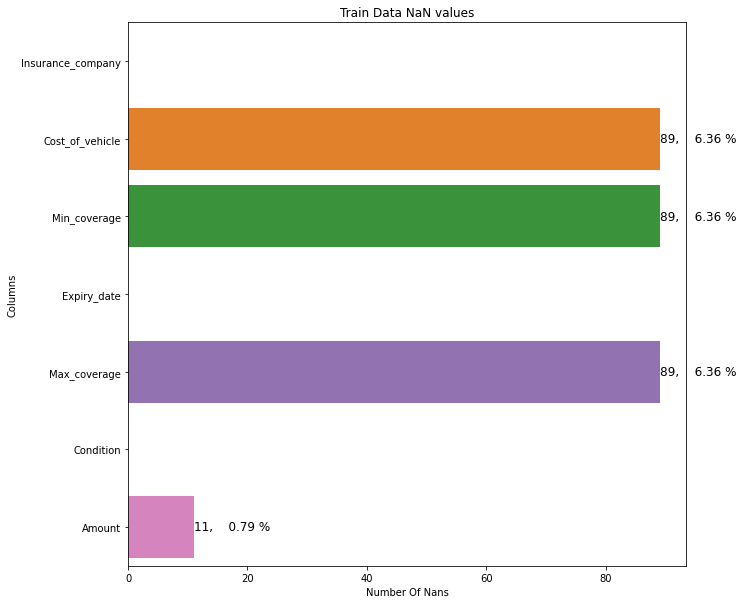

In [13]:
###### Missing Values
utils.plot_nan(train, "Train Data NaN values")

In [14]:
## Small % of na values => dropping them for base models.
train.dropna(inplace=True)

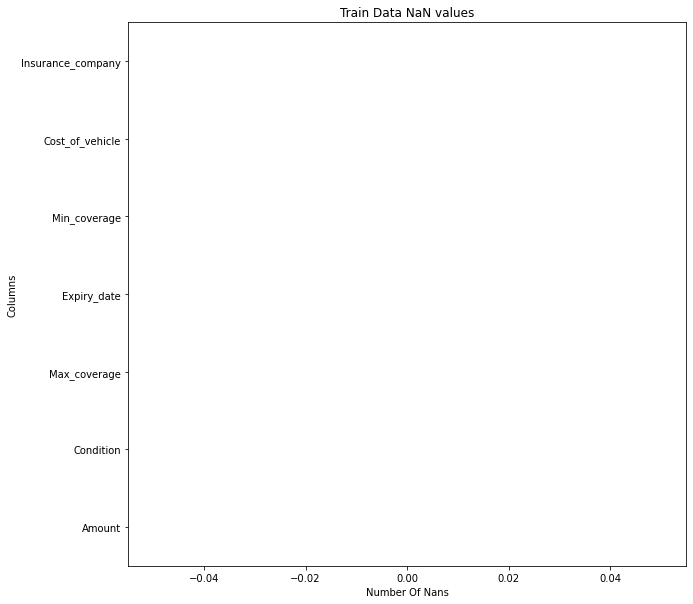

In [16]:
###### Missing Values are 0 now
utils.plot_nan(train, "Train Data NaN values")

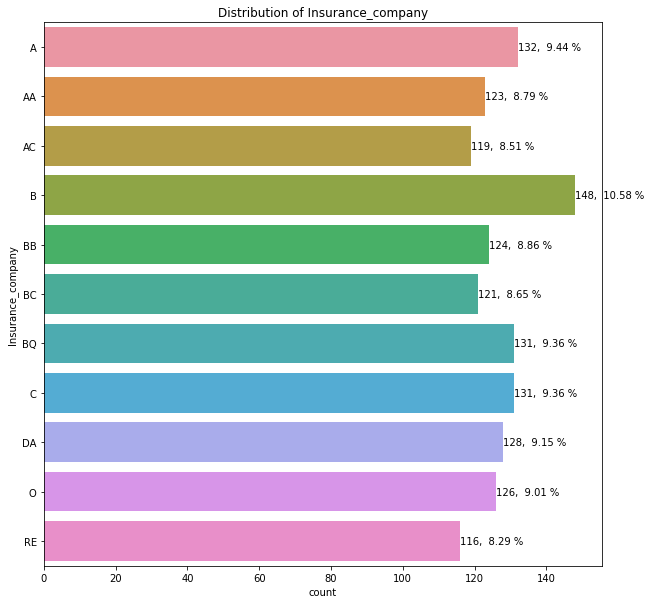

In [19]:
## Selecting categorical
cat_cols = train.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
## Plotting the barplot
for col in cat_cols:
    utils.barplot(train[col], col)

In [20]:
''' Almost uniform distribution in Insuarnce Company '''

' Almost uniform distribution in Insuarnce Company '

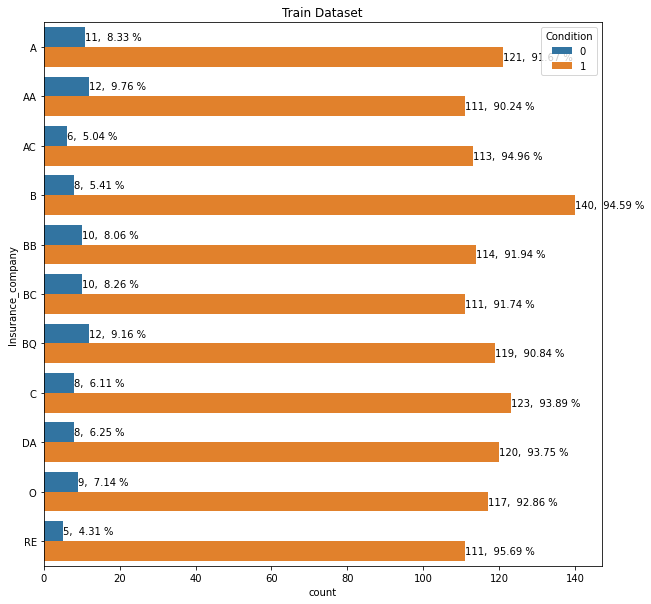

In [22]:
### Categorical data distribution wrt target variable
target = 'Condition'
for col in cat_cols:
    utils.barplot_hue(train[col], train[target], 'Train Dataset')

In [23]:
## Almost uniform here also => High randomness in data.

In [24]:
##### Numerical Columns
num_cols = train.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)

Distribution of Cost_of_vehicle of train dataset


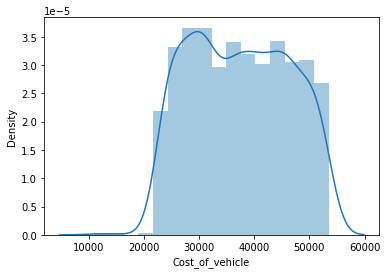

Distribution of Min_coverage of train dataset


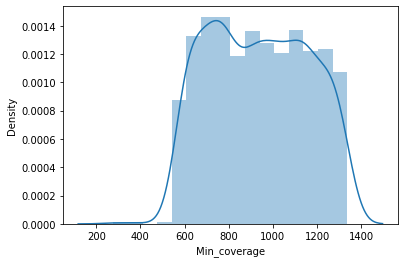

Distribution of Expiry_date of train dataset


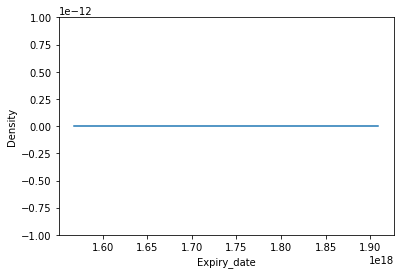

Distribution of Max_coverage of train dataset


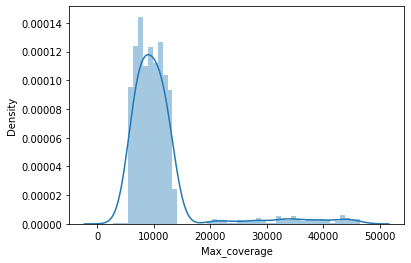

Distribution of Condition of train dataset


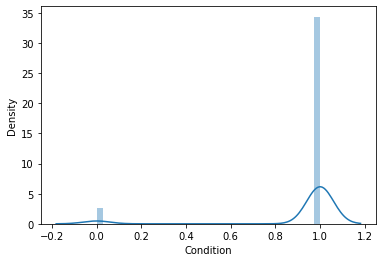

Distribution of Amount of train dataset


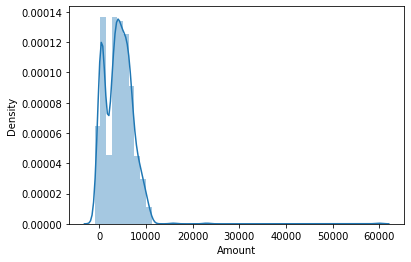

In [25]:
for col in num_cols:
    print("Distribution of " + col +" of train dataset")
    sns.distplot(train[col], kde=True)
    plt.show()

In [18]:
train.to_csv('train_modified.csv', index=False)